<a href="https://colab.research.google.com/github/Lakhankumawat/LearnPython/blob/main/PyGames/TicTacToe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **TIC TAC TOE**






1.   The game is played on a grid that's 3 squares by 3 squares.
2.   You are X, your friend (or the computer in this case) is O.
3.   Players take turns putting their marks in empty squares.
4.   The first player to get 3 of her marks in a row (up, down, across, or diagonally) is the winner.
5.   When all 9 squares are full, the game is over.

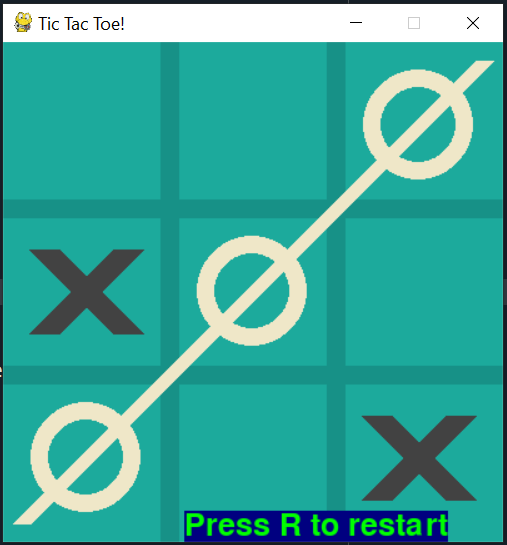




This is the game you will be making .


## [Tutorial Link](https://www.youtube.com/watch?v=pc7XhHxSgrM&t=1s)

## 👇 Program Code : Python

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 17 17:18:21 2021

@author: Lakhan Kumawat
"""

import pygame, sys
from pygame.locals import *
import numpy as np

#------
#constants
#-------
width=400
height=400
#row and columns
board_rows=3
board_columns=3
cross_width=25

square_size=width//board_columns
#colors in RGB format
line_Width=15
red=(255, 0, 0)
bg_color=(28, 170, 156)
line_color=(23, 145, 135)
circle_color=(239,231,200)
cross_color=(66,66,66)

space=square_size//4
#circle
circle_radius=square_size//3
circle_width=14

pygame.init()
screen = pygame.display.set_mode((height,width))
pygame.display.set_caption('Tic Tac Toe!')
screen.fill( bg_color )

#color to display restart
white = (255, 255, 255)
green = (0, 255, 0)
blue = (0, 0, 128)

font = pygame.font.Font('freesansbold.ttf', 25)
 
# create a text suface object,
# on which text is drawn on it.
text = font.render('Press R to restart', True, green, blue)
 
# create a rectangular object for the
# text surface object
textRect = text.get_rect()
textRect.center = (width-150, height-13)

board=np.zeros( (board_rows,board_columns))
#print(board)
#pygame.draw.line( screen ,red ,(10,10),(300,300),10)

def draw_figures():
    for row in range(board_rows):
        for col in range(board_columns):
            if board[row][col]==1:
                pygame.draw.circle(screen,circle_color,( int(col*square_size + square_size//2 ),int(row*square_size +square_size//2)),circle_radius,circle_width)
            elif board[row][col]==2:
                pygame.draw.line( screen ,cross_color ,(col*square_size + space,row*square_size +square_size -space),(col*square_size+square_size -space,row*square_size +space),cross_width)
                pygame.draw.line( screen ,cross_color ,(col*square_size +space,row*square_size +space),(col*square_size +square_size -space,row*square_size +square_size -space),cross_width)

def draw_lines():
    pygame.draw.line( screen ,line_color ,(0,square_size),(width,square_size),line_Width)
    #2nd horizontal line
    pygame.draw.line( screen ,line_color ,(0,2*square_size),(width,2*square_size),line_Width)
    #1st verticle
    pygame.draw.line( screen ,line_color ,(square_size,0),(square_size,height),line_Width)
    #2nd verticle
    pygame.draw.line( screen ,line_color ,(2*square_size,0),(2*square_size,height),line_Width)
    

#To mark which square player has chosen
def mark_square(row,col,player):
    board[row][col]=player


# TO check the availablity of a square
def available_square(row,col):
    return board[row][col]==0

#check board full or not
def is_board_full():
    for row in range(board_rows):
        for col in range(board_columns):
            if board[row][col]==0:
                return False
            else:
                return True


def check_win(player):
    #check verticle win
    for col in range(board_columns):
        if board[0][col]==player and board[1][col]==player and board[2][col]==player:
            draw_vertical_winning_line(col, player)
            return True
    #check Horizontal win
    for row in range(board_rows):
        if board[row][0]==player and board[row][1]==player and board[row][2]==player:
            draw_horizontal_winning_line(row, player)
            return True 
    #check for asc win
    if board[2][0]==player and board[1][1]==player and board[0][2]==player:
        draw_asc_diagonal(player)
        return True
    if board[0][0]==player and board[1][1]==player and board[2][2]==player:
        draw_des_diagonal(player)
        return True

def draw_horizontal_winning_line(row,player):
    posY=row*square_size +square_size//2
    
    if(player==1):
        color=circle_color
    else:
        color=cross_color
    
    pygame.draw.line(screen, color, (15,posY), (width-15,posY),15)
    
    
    
def draw_vertical_winning_line(col,player):
    posX=col*square_size +square_size//2
    if(player==1):
        color=circle_color
    else:
        color=cross_color
    
    pygame.draw.line(screen, color, (posX,15), (posX,width-15),15)
def draw_asc_diagonal(player):
    if(player==1):
        color=circle_color
    else:
        color=cross_color
        
    pygame.draw.line(screen,color,(15,height-15),(width-15,15),15)
def draw_des_diagonal(player):
    if(player==1):
        color=circle_color
    else:
        color=cross_color
        
    pygame.draw.line(screen,color,(15,15),(width-15,height-15),15)



def restart():
    screen.fill(bg_color)
    draw_lines()
    player = 1
    
    for row in range(board_rows):
        for col in range(board_columns):
            board[row][col]=0
    
       
draw_lines()
#player
player=1
game_over=False

while True: # main game loop
    for event in pygame.event.get(): #constantly looks for the event
        if event.type == pygame.QUIT: #if user clicks exit pygame.QUIT and sys exits
            pygame.quit()
            sys.exit()
        
        if event.type==pygame.MOUSEBUTTONDOWN and not game_over:
            mouseX= event.pos[0] #x
            mouseY= event.pos[1] #y
            
            clicked_row=int(mouseY // square_size)
            
            clicked_column=int(mouseX // square_size)
            
            if available_square(clicked_row, clicked_column):
                mark_square(clicked_row,clicked_column, player)
                if(check_win(player)):
                    game_over=True
                    screen.blit(text, textRect) 
                player=player%2 +1
            
                
                
                draw_figures()
        #to restart the game
        if event.type==pygame.KEYDOWN:
            if event.key==pygame.K_r:
                restart()
                game_over=False
                #print(board)
    pygame.display.update()    
            